In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.externals import joblib

%matplotlib inline
np.random.seed(42)

In [5]:
train_df = pd.read_csv("~/real_estate/data/v5/final/yelp/yelp_train_df_adasyn.csv")
test_df = pd.read_csv("~/real_estate/data/v5/final/yelp/yelp_test_df.csv")
test_df = test_df.loc[test_df["target"] != -5]

features = train_df.columns[:-1]

X_train = train_df[features]
X_test = test_df[features]
y_train = train_df["target"]
y_test = test_df["target"]

In [8]:
svr = SVR()
svr.fit(X_train, y_train)

/home/gnazareths/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# Predict
yhat_train = svr.predict(X_train)
yhat_test = svr.predict(X_test)

# Fetch errors
train_errors = yhat_train - y_train
test_errors = yhat_test - y_test

In [10]:
print("Mean test error: ", np.mean(test_errors))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(yhat_test, y_test)[0,1]))
print('---')
print("Mean train error: ", np.mean(train_errors))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(yhat_train, y_train)[0,1]))

Mean test error:  0.03992234899568987
Mean test value:  0.09950767659531681
R^2 test:  0.2088824866568086
---
Mean train error:  0.0038538336097957765
Mean train value:  0.06751510379543472
R^2 train:  0.8845717074328295


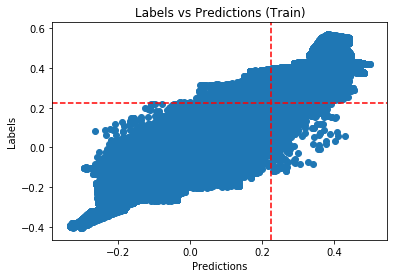

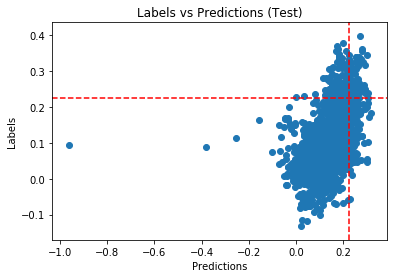

In [11]:
plt.scatter(yhat_train, y_train)
plt.title("Labels vs Predictions (Train)")
plt.ylabel("Labels")
plt.xlabel("Predictions")
plt.axvline(x=0.225, color="red", linestyle='--')
plt.axhline(y=0.225, color="r", linestyle='--')
plt.show()

plt.scatter(yhat_test, y_test)
plt.title("Labels vs Predictions (Test)")
plt.ylabel("Labels")
plt.xlabel("Predictions")
plt.axvline(x=0.225, color="red", linestyle='--')
plt.axhline(y=0.225, color="r", linestyle='--')
plt.show()